In [ ]:
# # to extract the zip files in the same directory
# !pip install zipfile36
# from zipfile import ZipFile
# with ZipFile('/content/drive/MyDrive/Colab Notebooks/Datasets/Cats vs. Dogs/dogs.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/Datasets/Cats vs. Dogs')

Dataset link: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset

In [ ]:
pip install opencv-python numpy scikit-learn matplotlib

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm

In [ ]:
# Define dataset paths (Update these paths to your dataset)
cat_dir = "/content/drive/MyDrive/Colab Notebooks/Datasets/Cats vs. Dogs/cats"
dog_dir = "/content/drive/MyDrive/Colab Notebooks/Datasets/Cats vs. Dogs/dogs"

# Image size for resizing
IMG_SIZE = (64, 64)

In [ ]:
# Function to extract HOG (Histogram of Oriented Gradients) features
def extract_hog_features(image):
    # Resize and convert to grayscale
    image = cv2.resize(image, IMG_SIZE)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Extract HOG features
    features, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), block_norm='L2-Hys',
                      visualize=True)
    return features, hog_image

# Load images and extract features
def load_data(directory, label, limit):
    features = []
    labels = []
    count = 0;

    for filename in tqdm(os.listdir(directory)):
        if count == limit:
            break
        count += 1
        img_path = os.path.join(directory, filename)
        image = cv2.imread(img_path)

        if image is not None:
            hog_features, temp = extract_hog_features(image)
            features.append(hog_features)
            labels.append(label)

    return np.array(features), np.array(labels)


(1764,)
(64, 64)


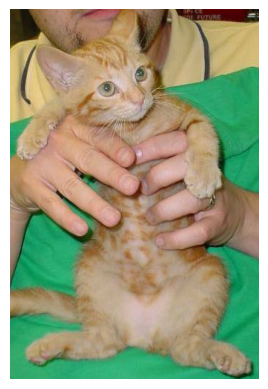

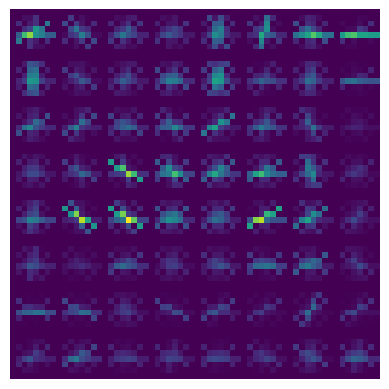

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         2.10288119 ... 0.83764476 0.         0.        ]
 [0.         7.66328514 0.         ... 0.         7.67009568 0.        ]
 ...
 [0.         6.01268911 0.         ... 0.         7.01282787 0.        ]
 [0.         0.         2.2073977  ... 0.60147071 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
img_path = os.path.join(cat_dir, 'cat.1001.jpg')
image = cv2.imread(img_path)
hog_feature, hog_img = extract_hog_features(image)
print(hog_feature.shape)
print(hog_img.shape)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

plt.imshow(hog_img)
plt.axis('off')
plt.show()

print(hog_img)

In [ ]:
# Load data
cat_features, cat_labels = load_data(cat_dir, 0, 500)  # 0 for Cats
dog_features, dog_labels = load_data(dog_dir, 1, 500)  # 1 for Dogs

# Combine data
X = np.vstack((cat_features, dog_features))
y = np.hstack((cat_labels, dog_labels))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

Model Accuracy: 65.00%


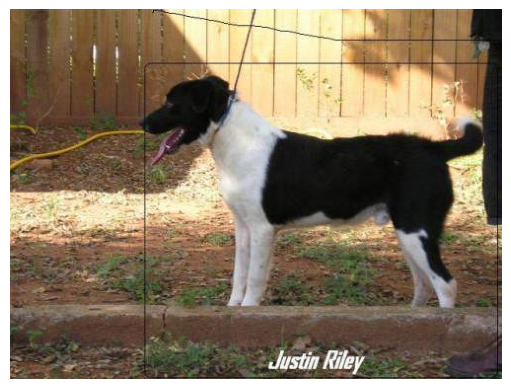

Prediction for test image: Dog


In [ ]:
# Function to predict new images
def predict_image(image_path):
    image = cv2.imread(image_path)
    hog_features = extract_hog_features(image)[0].reshape(1, -1)
    prediction = svm.predict(hog_features)
    return "Dog" if prediction[0] == 1 else "Cat"

# Test with a new image
test_image = os.path.join(dog_dir, 'dog.3565.jpg')
prediction = predict_image(test_image)

image = cv2.imread(test_image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
print(f"Prediction for test image: {prediction}")
